In [1]:
import numpy as np
import pandas as pd

In [2]:
from pathlib import Path
from math import sqrt
import glob
import os

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Find your dataset

In [9]:
home=Path.cwd()
home

PosixPath('/Users/austinlasseter/atelier/generalassembly/DATDC33/Lesson11_Evaluating_Linear_Regression/code')

In [11]:
home.parent

PosixPath('/Users/austinlasseter/atelier/generalassembly/DATDC33/Lesson11_Evaluating_Linear_Regression')

In [12]:
datadir=Path.joinpath(home.parent, 'data')
datadir

PosixPath('/Users/austinlasseter/atelier/generalassembly/DATDC33/Lesson11_Evaluating_Linear_Regression/data')

In [20]:
for cheeseburger in datadir.glob('*.csv'):
    print(cheeseburger.name)

sacramento.csv
counties.csv
beer_ratings.csv
hitters.csv


In [23]:
list_of_files=[]
for item in datadir.glob('*.csv'):
    list_of_files.append(item)

In [24]:
list_of_files[3]

PosixPath('/Users/austinlasseter/atelier/generalassembly/DATDC33/Lesson11_Evaluating_Linear_Regression/data/hitters.csv')

In [25]:
pd.read_csv(list_of_files[3])

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


## Exploratory data analysis

In [26]:
baseball = pd.read_csv('../data/hitters.csv')

In [28]:
baseball = pd.read_csv(list_of_files[3])
baseball.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [29]:
baseball.shape

(322, 20)

In [30]:
baseball.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [32]:
baseball.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [33]:
corrs=baseball.corr()
corrs

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


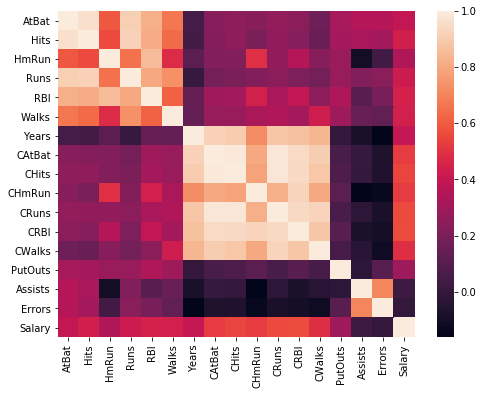

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(corrs);

In [43]:
corrs['Runs'].sort_values(ascending=False)

Runs       1.000000
Hits       0.922187
AtBat      0.913060
RBI        0.798206
Walks      0.732213
HmRun      0.650988
Salary     0.419859
PutOuts    0.279347
CRuns      0.250556
Errors     0.240475
CHmRun     0.227913
Assists    0.220567
CRBI       0.205976
CHits      0.204830
CAtBat     0.186497
CWalks     0.182168
Years      0.004541
Name: Runs, dtype: float64

## Model Building

In [44]:
y = baseball['Runs']

In [46]:
X = baseball[['AtBat', 'Hits', 'HmRun', 'RBI', 'Walks']]

In [48]:
X_train, 
X_test, 
y_train, 
y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [57]:
# instantiate the SKLearn class
my_model = LinearRegression()

In [59]:
my_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
y_pred = my_model.predict(X_test)

## Evaluation

In [64]:
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))

In [65]:
rmse

7.032796752511723

In [66]:
avg_val = y_train.mean()
avg_val

49.644444444444446

In [67]:
# If we used that as our predictor, then the average error of our model would be:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip=sqrt(metrics.mean_squared_error(y_test, comparison_array))
print(round(coin_flip))

27


In [68]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.9321587691151509

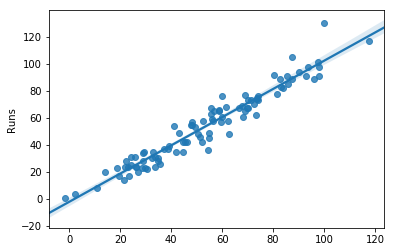

In [70]:
sns.regplot(x=y_pred, y=y_test);

In [73]:
y_pred-y_test>10

173    False
132    False
197    False
9      False
104    False
119    False
256    False
158    False
226    False
311    False
196    False
90     False
281    False
84     False
185     True
269    False
126    False
78     False
25     False
5      False
204    False
55     False
46     False
305    False
299    False
114    False
57     False
77     False
195    False
255    False
       ...  
24     False
176    False
110    False
73     False
101    False
137    False
253    False
271    False
113    False
218     True
319    False
245    False
31     False
268    False
168    False
148    False
221    False
227    False
139    False
59     False
163    False
6      False
198    False
30     False
22     False
274    False
247    False
56     False
167    False
145    False
Name: Runs, Length: 97, dtype: bool

## Look at a single prediction

In [75]:
X_test.head(3)

,AtBat,Hits,HmRun,RBI,Walks
173,161,43,4,26,22
132,278,70,7,37,18
197,166,34,0,13,17


In [76]:
X_test.loc[173]

AtBat    161
Hits      43
HmRun      4
RBI       26
Walks     22
Name: 173, dtype: int64

In [77]:
y_test.loc[173]

17

In [78]:
y_pred[0]

19.563280343508044

In [79]:
round(y_train.mean())

50

## Make predictions on new data

In [81]:
Runs=132
AtBat=533
Hits=188
HmRun=52
RBI=130
Walks=112

In [82]:
 # We need to reshape the data into a 2D numpy array
row=np.array([AtBat, Hits, HmRun, RBI, Walks])
row_reshaped=row.reshape(1, 5)
row_reshaped

array([[533, 188,  52, 130, 112]])

In [83]:
prediction=my_model.predict(row_reshaped)

In [84]:
prediction[0]

125.6065535042539